# Monte Carlo Path Generator

In [1]:
from pyFTracks.path_generators import MonteCarloPathGenerator

In [2]:
A = MonteCarloPathGenerator((0, 120), (0, 150))

In [3]:
constrain2 = {'time': (60., 150),
              'temperature': (60., 100.)}

constrain3 = {'time': (50., 60.),
              'temperature': (0., 10.)}

constrain4 = {'time': (30., 40.),
              'temperature': (20., 40.)}

constrain5 = {'time': (0., 20.),
              'temperature': (0., 10.)}

In [4]:
constrains = [constrain2, constrain3, constrain4, constrain5]

In [5]:
A.add_constraint(constrains)

[{'time': (0.0, 0.0), 'temperature': (0.0, 20.0)},
 {'time': (60.0, 150), 'temperature': (60.0, 100.0)},
 {'time': (50.0, 60.0), 'temperature': (0.0, 10.0)},
 {'time': (30.0, 40.0), 'temperature': (20.0, 40.0)},
 {'time': (0.0, 20.0), 'temperature': (0.0, 10.0)}]

In [6]:
A.constraints

[{'time': (0.0, 0.0), 'temperature': (0.0, 20.0)},
 {'time': (60.0, 150), 'temperature': (60.0, 100.0)},
 {'time': (50.0, 60.0), 'temperature': (0.0, 10.0)},
 {'time': (30.0, 40.0), 'temperature': (20.0, 40.0)},
 {'time': (0.0, 20.0), 'temperature': (0.0, 10.0)}]

# Pick a Random path as an outcome

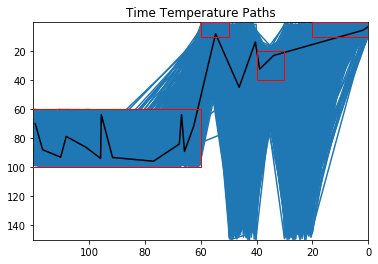

In [7]:
A.generate_paths()
true_path = A.TTPaths[500]
ax = A.plot_paths()
ax.plot(true_path[:, 0], true_path[:, 1], color="k")

## Generate synthetic track lengths

In [8]:
from pyFTracks.annealing import Ketcham1999
from pyFTracks.thermal_history import ThermalHistory

In [9]:
model = Ketcham1999()
model.kinetic_parameter_type = "ETCH_PIT_LENGTH"
model.kinetic_parameter = 1.65
model.history = ThermalHistory(true_path[:, 0], true_path[:, 1])

In [10]:
model.calculate_age()

(119.31159249259458, 134.17166529547944, 1.128919136550727)

In [15]:
synthetic_lengths = model.generate_synthetic_lengths()

In [16]:
import scipy
import numpy as np

In [17]:
# Create a distribution from histogram
hist_dist = scipy.stats.rv_histogram(np.histogram(synthetic_counts, bins=19))

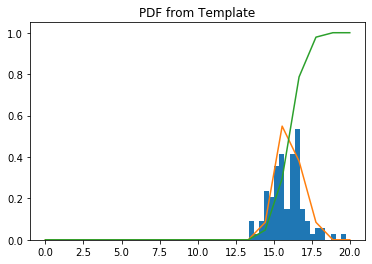

In [19]:
import matplotlib.pyplot as plt
X = np.linspace(0, 20.0, 19)
plt.title("PDF from Template")
plt.hist(synthetic_lengths, density=True, bins=19)
plt.plot(X, hist_dist.pdf(X), label='PDF')
plt.plot(X, hist_dist.cdf(X), label='CDF')
plt.show()

In [35]:
model.pdf_axis, model.cdf

(array([ 0.05,  0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75,  0.85,
         0.95,  1.05,  1.15,  1.25,  1.35,  1.45,  1.55,  1.65,  1.75,
         1.85,  1.95,  2.05,  2.15,  2.25,  2.35,  2.45,  2.55,  2.65,
         2.75,  2.85,  2.95,  3.05,  3.15,  3.25,  3.35,  3.45,  3.55,
         3.65,  3.75,  3.85,  3.95,  4.05,  4.15,  4.25,  4.35,  4.45,
         4.55,  4.65,  4.75,  4.85,  4.95,  5.05,  5.15,  5.25,  5.35,
         5.45,  5.55,  5.65,  5.75,  5.85,  5.95,  6.05,  6.15,  6.25,
         6.35,  6.45,  6.55,  6.65,  6.75,  6.85,  6.95,  7.05,  7.15,
         7.25,  7.35,  7.45,  7.55,  7.65,  7.75,  7.85,  7.95,  8.05,
         8.15,  8.25,  8.35,  8.45,  8.55,  8.65,  8.75,  8.85,  8.95,
         9.05,  9.15,  9.25,  9.35,  9.45,  9.55,  9.65,  9.75,  9.85,
         9.95, 10.05, 10.15, 10.25, 10.35, 10.45, 10.55, 10.65, 10.75,
        10.85, 10.95, 11.05, 11.15, 11.25, 11.35, 11.45, 11.55, 11.65,
        11.75, 11.85, 11.95, 12.05, 12.15, 12.25, 12.35, 12.45, 12.55,
      

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [65]:
cdf = scipy.stats.rv_discrete(values=(np.array(range(len(model.pdf))), model.pdf))

In [66]:
cdf.cdf(12.)

0.0

In [42]:
scipy.stats.kstest(synthetic_lengths, scipy.stats.rv_discrete(values=(range(len(model.pdf)), model.pdf)).cdf)

TypeError: unsupported operand type(s) for -: 'float' and 'rv_frozen'

# Inversion

In [16]:
model = Ketcham1999()
model.kinetic_parameter_type = "ETCH_PIT_LENGTH"
model.kinetic_parameter = 1.65

In [17]:
ages = []

for path in A.TTPaths:
    time = path[:, 0]
    temperature = path[:, 1]
    history = ThermalHistory(time, temperature)
    model.history = history
    ages.append(model.calculate_age()[1])